##### 閉包 ( Closure )
本篇教學會介紹 Python 裡的「閉包 Closure」，進一步理解作用域 ( scope ) 和自由變數的概念。

##### 什麼是閉包 closure？ 
閉包，從字面的意思翻譯就是一個「封閉的包裹」，在包裹外的人，無法拿到包裹裡的東西，如果你在包裹裡，\
就能盡情取用包裹內的東西，閉包可以保存在函式作用範圍內的狀態，不會受到其他函式的影響，\
且無法從其他函式取得閉包內的資料，也可避免建立許多全域變數互相干擾。

閉包的定義：
* A 函式中定義了 B 函式。
* B 函式使用了 A 函式的變數。
* A 函式回傳了 B 函式。

下方的程式碼，就是一個簡單閉包的例子。

In [ ]:
def a(msg):
    i = '!!!'         # ------------------------ 閉包開始
    def b():          # A 函式內定義了 B 函式
        print(msg + i)  # B 函式使用了 A 函式的變數
    return b          # 將 B 函式當作回傳值 ------- 閉包結束
s = a('hello')
s()                 # hello

##### 什麼是作用域 scope？ 
作用域 Scope 指的是變數、常數、函式或其他定義語句可以「被存取得到」的範圍，Python 總共定義了四種作用域，\
從內而外分別是 Local ( 區域 )、Enclosing ( 閉包外函式 )、Global ( 全域 ) 和 Built-in ( 內置預設 )，\
內部的作用域無法影響到外部作用域。

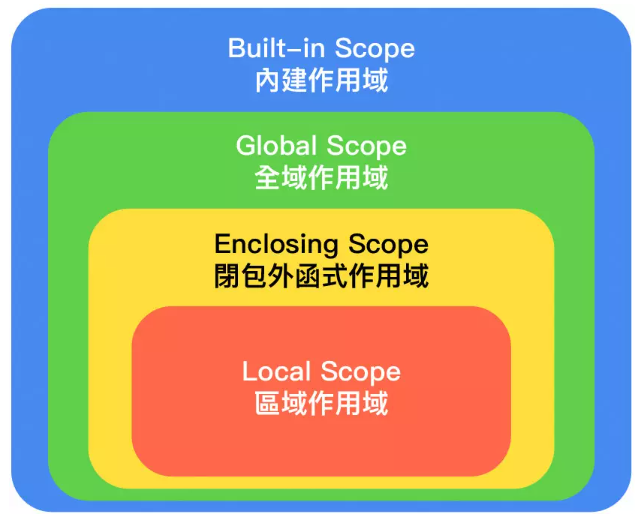

##### 閉包的範例應用 
下方的程式碼，會建立一個 avg 函式的閉包，執行後雖然 test() 執行了三次，但因為每次執行時保留下一個作用域的繫結關係，\
所以會不斷將傳入的數值進行計算，最後就會得到 11 的結果。

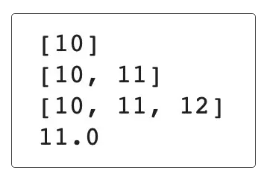

In [ ]:
def count():                # 建立一個 count 函式
    a = []                    # 函式內有區域變數 a 是串列
    def avg(val):             # 建立內置函式 avg ( 閉包 )
        a.append(val)           # 將參數數值加入變數 a
        print(a)                # 印出 a
        return sum(a)/len(a)    # 回傳 a 串列所有數值的平均
    return avg                # 回傳 avg

test = count()
test(10)      # 將 10 存入 a
test(11)      # 將 11 存入 a
test(12)      # 印出 11

##### 自由變數 nonlocal 
不過如果將上方的例子，改成變數的做法，可能就會發生錯誤，因為在 cal 函式裡的變數 a 後方使用了「等號」，\
意義等同於變數的「賦值」，換句話說是新建了一個區域變數 a，就造成了名稱空間裡名稱重疊的問題。

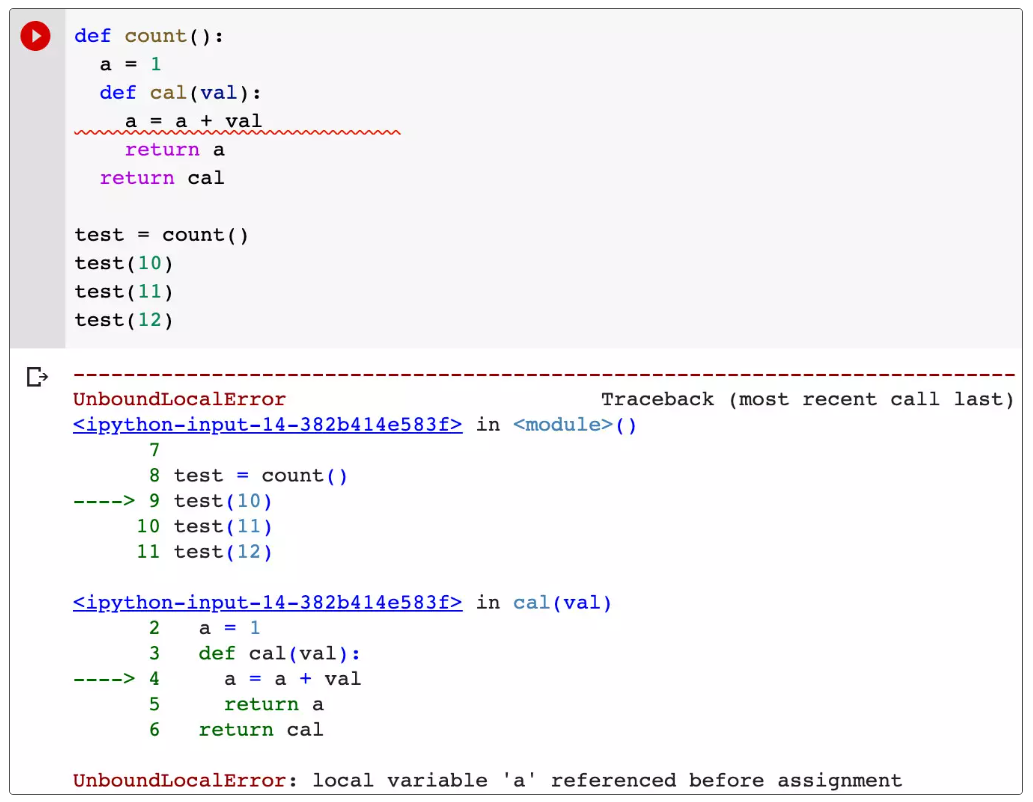

In [ ]:
def count():          # 建立一個 count 函式
    a = 1               # 新增變數 a 等於 1
    def cal(val):       # 建立內置函式 cal ( 閉包 )
        a = a + val       # 設定變數 a 等於 a + val
        return a          # 回傳 a
    return cal          # 回傳 cal

test = count()
test(10)
test(11)
test(12) 

如果必須這麼做，可以使用 nonlocal 的方式，宣告這個變數是「自由變數」( 不是這個區域裡的變數 )，就能正常使用這個變數。

In [ ]:
def count():
    a = 1
    def cal(val):
        nonlocal a    # 宣告 a 為自由變數
        a = a + val
        return a
    return cal

test = count()
test(10)
test(11)
test(12)    # 34 ( 1 + 10 + 11 + 12 )